<!--<p style="background-image: url('ai_logo.gif'; background-size: 4000px 3000px;">-->

<div style="font-size: 60px; font-weight:bold; margin:20px; margin-bottom:100px; text-align: justify; text-shadow: 1px 1px 1px #919191,
        1px 2px 1px #919191,
        1px 3px 1px #919191,
        1px 4px 1px #919191,
        1px 5px 1px #919191,
        1px 6px 1px #919191,
        1px 7px 1px #919191,
        1px 8px 1px #919191,
        1px 9px 1px #919191,
        1px 10px 1px #919191,
    1px 18px 6px rgba(16,16,16,0.4),
    1px 22px 10px rgba(16,16,16,0.2),
    1px 25px 35px rgba(16,16,16,0.2),
    1px 30px 60px rgba(16,16,16,0.4)"> VARIATIONAL AUTOENCODERS </div>
    <div style="font-style: italic; font-weight: bold; font-size:35px; text-align:center; font-family: Garamond">by Rubén Cañadas Rodríguez</div>

<div style="font-size: 30px; margin: 20px; margin-bottom: 40px; margin-left: 0px; line-height: 40pt">

<div style="font-size: 30px; font-family: Garamond; font-weight: bold; margin: 30px; margin-left: 0px; margin-bottom: 10px; ">Contents</div>
<ol>
<li>Introduction</li>
<li>Autoencoders</li>
<li>Variational autoencoders</li> 
<li>Coding</li> 
<li>Conclusions</li> 
</ol>
</div>

<div style="font-size: 30px; font-weight: bold; margin-bottom: 20px; margin-top: 30px"> Introduction </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
Generative models are becoming more and more popular in the machine learning community. For instance they have been used in drug discovery to obtain new molecules from the learned distribution representing a chemical subspace. Other examples are data denoising, dimensionality reduction or music creation. Every day, new applications of generative models are appearing in a wide range of fields. These make generative models and in specific, autoencoder and its variations, awesome methods to learn and implement.
</div>

<div style="font-size: 30px; font-weight: bold; margin-bottom: 20px; margin-top: 30px"> Autoencoders </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
Autoencoders are a special type of deep learning architecture which involves two main pieces: the encoder and the decoder. The input data, for example, images, which can be represented as tensors in a certain vector space, are compressed throughout the encoder until reaching a vector space with an special name: the latent space, which in principle, contains the basic information of the input data. This can be seen as an unsupervised machine learning technique in which the representation dimensions of the input data are shrunk. Then, the decoder uses the latent space two recunstruct the input data. The loss function is how different the decoder output is to the encoder input. This why the two neural networks can be trained so as to to obtain a good representation of the input data in the latent space. 
</div>
<img src="images/image.png" width="800" style="padding: 15px">
<div style="font-size: 30px; font-weight: bold; margin-bottom: 20px; margin-top: 40px; "> Variational autoencoders </div>

<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
Variational autoencoders (VAEs) are a special type of autoencoder in which a continous distribution function of the training data is infered. Knowing this distribution allows us to sample from there and obtain samples having a high probability of being similar to our training data.
First, the encoder tries to approximate the function P(z|x), which is the probability distribution of obtaining z given x. It will obtain the hidden representation in a latent vector space, given the input dataset. Actually, the encoder produces a mean coding $\mu$ and a standard deviation $\sigma$. Then, the Gaussian distribution $N(\mu, \sigma^{2}$) is sampled, and the decoder approximates the $P(x|z)$ meaning that it recreates the data from the samples obtained from the distribution generated by the encoder
</div>
<img src="images/vae.png" width="800" style="padding: 10px; margin-left:20px">
 <!-- <div style="color: black; text-align: center; margin: 20px"> equation -->


<div style="font-size: 30px; font-weight: bold; margin-bottom: 20px; margin-top: 30px"> Coding </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
In this example we are going to use the MNIST dataset downloaded directly from tensorflow.examples.
First, we specify the different variables:
<div style="margin: 20px; font-family: Garamond;"> <!--for ordered list properties-->
<ol>
<li><b>batch_size</b>: number of instances used in the minibatch gradient descent approximation</li>
<li><b>X_in</b>: Defining a placeholder for saving the images used in the training examples. The shape is the shape of the tensor to be fed. None means that it will be the size of the training batches</li>
<li><b>Y</b>: This placeholder will hold the images reconstructed by the decoder part of the autoencoder</li>
<li><b>Y_flat</b>: Y reshaped in order to be used when computing losses</li>
<li><b>keep_prob</b>: This is used as a placeholder when using the dropout regularization technique<</li>
<li><b>reshaped_dim</b>: dimension of the decoder when sarting the transpose convolutional2D layers after the dense layers
architecture</li>
<li><b>inputs_decoder</b>: The dimension of the inputs in the decoder phase</li>
</ol>
</div>
The leaky_relu is defined since tensorflow does not have a predefined one (since 1.4.0 release tf.nn.leaky_relu can be used)

The encoder if the first part of the architecture. In this phase, the aim is to find a lower dimensional representation of the images until obtaining the latent variables Z. Firstly, the images are reshaped according to the tensor dimensions:
[batch_size, height, width, channels]. -1 in batch_size means using the batch size defined when splitting the dataset
into batches. RGB for example has 3 channels whereas white and black images have 1 as channels.
The encoder has basically convolutional layers since we are treating with images. However, other types of architectures could be employed instead. 

<img src="images/conv.jpeg" width="800" style="margin-left:20px">

The mean and standard deviation necessary for the reparametrization trick will be computed using two dense layers which
will be optimized for computing them via the gradients.
The decoder can sample from Q(Z|X) distribution in order to obtain the images back to their real form. Nonetheless, since sampling is stochastic we cannot use backpropagation! To solve this we can apply: z = mean + deviation * epsilon (* meaning elementwise or Hadamard multiplication). This way, all the randomness is saved in the epsilon variables and now
we can use gradients in order to optimize the theta and phi parameters. This is called the reparametrization trick.
Then, the decoder can sample from the learned representation and use deconvolutational layers in order to perform the reverse process: construct the image given the low-dimensional representation (latent space). </div>
<!--<div style="font-size: 30px; font-weight: bold; margin-bottom: 20px; margin-top: 30px"> Conclusions </div>-->

</div>
<div style="font-size: 30px; font-weight:bold; margin: 20px; margin-top:30px; margin-bottom: 30px; text-align: justify"> <b>Importing packages and modules</b> </div>

In [1]:
from sklearn.decomposition import PCA
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
from functools import wraps
import os, sys, time
%matplotlib inline 

<div style="font-size: 30px; font-weight:bold; margin: 20px; margin-top:30px; margin-bottom: 30px; text-align: justify"> <b>Decorators</b> </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
This section include some interesting decorators that will be used in the autoencoder architecture.
Basically decorators are methods that modify the functionality of the function they decorate. The tensorboard
graph decorator produces a the network graph that can be viewed in a given URL using tensorboad utility.
The timing decorator allows to know the execution time of a certain function. The staticmethod decorator defines a method that is not instance dependent. It only depends on the class in which it is found. 

</div>

In [2]:
class Decorators(object):

    @staticmethod
    def tensorboad_graph(path=os.getcwd()):
        
        """
        This decorator allows to create the graph in tensorboard.
        run this command on the terminal in the directory "path": python -m tensorboard.main --logdir=.
        and then enter the following URL: http://localhost:6006/
        
        """
        def mydecorator(func):
            @wraps(func)
            def mywrapper(self, *args, **kwargs):
                func(self, *args, **kwargs)
                with tf.Session() as sess:
                    writer = tf.summary.FileWriter(os.path.join(path, "graphs"), sess.graph)
                    msg = \
                    """
                    run this command on the terminal in the directory "path": 
                    python -m tensorboard.main --logdir=.
                    and then enter the following URL: http://localhost:6006/
                    """
                    print("INSTRUCTIONS FOR TENSFORBOARD: \n {}".format(msg))
            return mywrapper
        return mydecorator
    
    
    @staticmethod
    def timing(func):
        
        """
        This decorator allows to know how much time is the execution time of the
        decoratedd function/method in seconds
        
        """
        
        @wraps(func)
        def mywrapper(self, *args, **kwargs):
            start = time.time()
            return_variable = func(self, *args, **kwargs)
            end = time.time()
            print("Execution time of method {}: {} seconds".format(func.__name__, 
                                                                   round(end-start, 3)))
            return return_variable
        return mywrapper


<div style="font-size: 30px; font-weight:bold; margin: 20px; margin-top:30px; margin-bottom: 30px; text-align: justify">
Data preparation and network architecture </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
The PrepareData class is the parent class of the precding classes since it has all the placeholders and values
defining the structure of the encoder and decoder. In this example we work with the MNIST dataset that holds 28x28 images, as mentioned before. The placeholders will hold this data when the session is initilized. Now we are only defining the static graph (in Pytorch or Tensorflow 2.0 dynamic graphs can be defined). Most of the variables have been defined above. Inputs decoder means the number of instances that are going to be sampled from the z distribution built in the encoder phase. The reshaped_dim is the shape of the sampled instances since we need a 4-dimensional vector to feed the convolutional layers. Finally the inputs_decoder refer to the number of instances are sampled from the learned distibution and will fed into the decoder layer. 
</div>

In [9]:
class PrepareData(object):

    def __init__(self, batch_size, latent_variables, dec_in_channels):
        
        self._mnist =  input_data.read_data_sets("MNIST", one_hot=False)
        self._X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name="X")
        self._Y = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name="Y")
        self._Y_flat = tf.reshape(self._Y, shape=[-1, 28 * 28])
        self._keep_prob = tf.placeholder(dtype=tf.float32, shape=(), 
                                         name="keep_prob") #Used for dropout layers
        self._number_of_latent_variables = latent_variables
        self._batch_size = batch_size
        self._dec_in_channels = dec_in_channels
        self._reshaped_dim = [-1, 7, 7, self._dec_in_channels]
        self._inputs_decoder = 49
        
    def __str__(self):
        
        return "variables: \n latent variables: {} \n batch size: {}".format(self._number_of_latent_variables, 
                                                                             self.batch_size)
    
class AutoencoderArchitecture(PrepareData):
    
    def __init__(self, batch_size, latent_variables, dec_in_channels):
        super(AutoencoderArchitecture, self).__init__(batch_size, latent_variables, dec_in_channels)
        
    def leaky_relu(self, x, alpha=0.3):
        return tf.maximum(x, tf.multiply(x, alpha))

    def _encoder(self):
        with tf.variable_scope("encoder", reuse=None):
            X_reshaped = tf.reshape(self._X_in, shape=[-1, 28, 28, 1]) #reshape where -1 means the batch_size, 
                                                                #28 the height, 28 the width and 1 the number of channels!
            X = tf.layers.conv2d(X_reshaped, filters=64, kernel_size=4, strides=2,
                                 padding="same", activation=self.leaky_relu)
            X = tf.nn.dropout(X, self._keep_prob)
            X = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2,
                                 padding="same", activation=self.leaky_relu)
            X = tf.nn.dropout(X, self._keep_prob)
            X = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=1, 
                                 padding="same", activation=self.leaky_relu)
            X = tf.nn.dropout(X, self._keep_prob)
            X = tf.contrib.layers.flatten(X) 
            mean = tf.layers.dense(X, units=self._number_of_latent_variables)
            sd = 0.5 * tf.layers.dense(X, units=self._number_of_latent_variables)
            epsilon = tf.random_normal([tf.shape(X)[0], self._number_of_latent_variables])
            z = mean + tf.multiply(epsilon, tf.exp(sd)) 
            #tf.multiply is elementwise or Hadamard multiplication!

            return z, mean, sd

    def _decoder(self, sampled_z):

        with tf.variable_scope("decoder", reuse=None):
            X = tf.layers.dense(sampled_z, units=self._inputs_decoder, activation=self.leaky_relu)
            X = tf.layers.dense(X, units=self._inputs_decoder, activation=self.leaky_relu)
            X = tf.reshape(X, self._reshaped_dim)
            X = tf.layers.conv2d_transpose(X, filters=64, kernel_size=4, strides=2, 
                                 padding="same", activation=tf.nn.relu)
            X = tf.nn.dropout(X, self._keep_prob)
            X = tf.layers.conv2d_transpose(X, filters=64, kernel_size=4, strides=1, 
                                 padding="same", activation=tf.nn.relu)
            X = tf.nn.dropout(X, self._keep_prob)
            X = tf.layers.conv2d_transpose(X, filters=64, kernel_size=4, strides=1, 
                                 padding="same", activation=tf.nn.relu)
            X_flatten = tf.contrib.layers.flatten(X)
            X_dense = tf.layers.dense(X_flatten, units=28*28, activation=tf.nn.sigmoid)
            img = tf.reshape(X_dense, shape=[-1, 28, 28])

            return img


class AutoencoderTrainer(AutoencoderArchitecture):
    
    def __init__(self, batch_size=64, latent_variables=20, dec_in_channels=1, iterations=100):
        super(AutoencoderTrainer, self).__init__(batch_size, latent_variables, dec_in_channels)

        self._sampled, self._mean, self._standard = self._encoder()
        self.__iterations = iterations

    @property
    def iterations(self):
        return self.__iterations
    
    @property
    def batch_size(self):
        return self._batch_size
    
    @property
    def latent_variables(self):
        return self._number_of_latent_variables

    @Decorators.timing
    def train(self):

        dec = self._decoder(self._sampled)
        unreshaped = tf.reshape(dec, [-1, 28 * 28])
        img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, self._Y_flat), 1) 
        #Log-likelihood 
        latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * self._standard - tf.square(self._mean) \
                                           - tf.exp(2.0 * self._standard), 1) 
                                            #Kullback-Leibler divergence
        
        loss = tf.reduce_mean(img_loss + latent_loss)
        optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
        
        sess = tf.Session()
        sess.run(tf.global_variables_initializer()) #Initializing variables
        for i in range(self.__iterations):
            batch = [np.reshape(b, [28, 28]) for b in \
                     self._mnist.train.next_batch(batch_size=self._batch_size)[0]]
            labels = self._mnist.train.next_batch(batch_size=self._batch_size)[1]
            sess.run(optimizer, feed_dict={self._X_in: batch, 
                                           self._Y: batch, self._keep_prob: 0.8})
        ModelAnalysis(sess, self._number_of_latent_variables, dec, 
                      self._sampled, self._keep_prob)._data_generator()



<div style="font-size: 30px; font-weight:bold; margin: 20px; margin-top:30px; margin-bottom: 30px; text-align: justify">
Data generation </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
    Once the internal representation has been learned, instances can be sampled out of it and new data can be generated following the learned distribution. The following class is the responsible of doing such task. Then, this class is called from the AutoencoderTrainer class after the training has been completed.
</div>

In [1]:
class ModelAnalysis(object):
    
    def __init__(self, sess, num_latent, decoder, sampled_distribution, keep_prob):
        
        self.__sess = sess
        self.__num_of_latent_variables = num_latent
        self.__decoder = decoder
        self.__sampled_distribution = sampled_distribution
        self.__keep_prob = keep_prob
        self.__number_of_images = 5
        
        
    def _data_generator(self):
        
        randoms = [np.random.normal(0, 1, 
                                    self.__num_of_latent_variables) for _ in range(self.__number_of_images)]
        imgs = self.__sess.run(self.__decoder, 
                               feed_dict={self.__sampled_distribution: randoms,
                                          self.__keep_prob: 1.0})
        
        imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]
        for img in imgs:
            plt.figure(figsize=(1,1))
            plt.axis("off")
            plt.imshow(img, cmap="gray")
            plt.show()
    
    

<div style="font-size: 30px; font-weight:bold; margin: 20px; margin-top:30px; margin-bottom: 30px; text-align: justify">
Main </div>
<div style="text-align:justify; font-family: Garamond; font-size:20px; margin: 20px; margin-left: 0px; line-height: 24pt">
    This function create the objects and launches the job.
</div>

Using tensorflow 1.14.0 for generating the variational autoencoder
Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz

            PARAMETERS 


    Number of iterations: 400 

    Batch size: 64 
 
    Number of latent variables: 49 

    


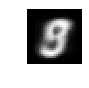

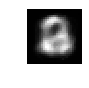

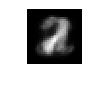

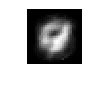

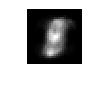

Execution time of method train: 158.328 seconds


In [11]:
def main():
    
    print("Using tensorflow {} for generating the variational autoencoder".format(tf.__version__))
    tf.reset_default_graph()
    trainer = AutoencoderTrainer(batch_size=64, latent_variables=49, iterations=400)
    parameters = """
            PARAMETERS \n\n
    Number of iterations: {} \n
    Batch size: {} \n 
    Number of latent variables: {} \n
    """.format(trainer.iterations, trainer.batch_size, trainer.latent_variables)
    print(parameters)
    trainer.train()
    
main()